In [50]:
from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob

# Loading Data

In [51]:
test_mode = False

if test_mode:
    #use 1 train data for testing code
    data = pd.read_csv("./data/data-1.txt", sep=";").to_numpy()
    data = data[:, 1:]
    train_data = data[:int(len(data) * 0.9)]
    test_data = data[int(len(data) * 0.9):]
else:
    # Load all the data
    data_path = "./data/"
    data_files = glob.glob(data_path + "*.txt")
    print("Data files found:", data_files)
    data = []
    for file in data_files[:-1]:  # Exclude the last file
        df = pd.read_csv(file, sep=";").to_numpy()
        data.append(df[:, 1:])  # remove the first column (index)
    train_data = np.concatenate(data, axis=0)  # concatenate all data
    test_data = pd.read_csv(data_files[-1], sep=";").to_numpy()
    test_data = test_data[:, 1:] 

Data files found: ['./data/data-9.txt', './data/data-8.txt', './data/data-3.txt', './data/data-2.txt', './data/data-1.txt', './data/data-5.txt', './data/data-4.txt', './data/data-10.txt', './data/data-6.txt', './data/data-7.txt']


In [52]:
test_data.shape

(700, 3)

# data plot

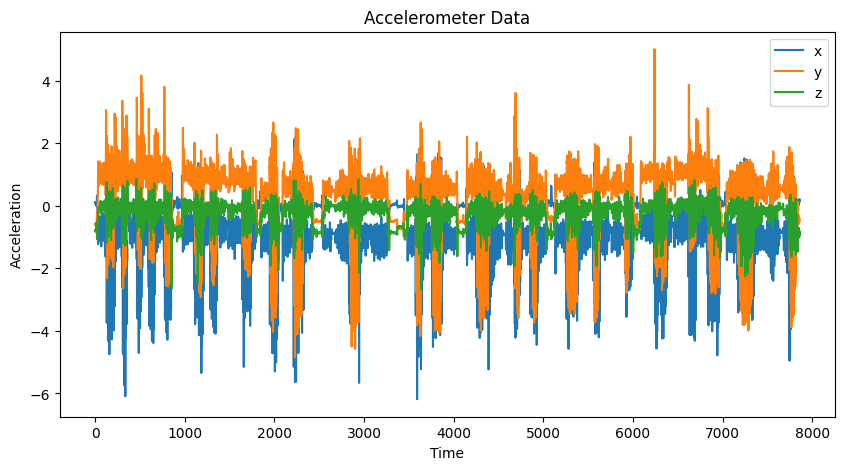

In [53]:
plt.figure(figsize=(10, 5))
x = train_data[:, 0]
y = train_data[:, 1]
z = train_data[:, 2]
time = np.arange(len(x))
plt.plot(time, x, label="x")
plt.plot(time, y, label="y")
plt.plot(time, z, label="z")
plt.title("Accelerometer Data")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.show()

# Use sample data for initialization

In [54]:
stand_sample = pd.read_csv("./sample/Standing-1.txt",sep=";").to_numpy()
stand_sample= stand_sample[:, 1:]
mean1 = np.mean(stand_sample, axis=0)
cov1 = np.cov(stand_sample.T)
print("mean: ", mean1)
print("cov: ", cov1)

mean:  [-0.14627557 -0.06211391 -0.73044946]
cov:  [[3.16804697e-01 2.10281989e-04 3.96314050e-02]
 [2.10281989e-04 7.44663298e-02 4.02394825e-02]
 [3.96314050e-02 4.02394825e-02 5.60014791e-02]]


In [55]:
walk_sample = pd.read_csv('./sample/Walking-1.txt',sep=";").to_numpy()
walk_sample = walk_sample[:,1:] # remove the first column
mean2 = np.mean(walk_sample, axis=0)
cov2 = np.cov(walk_sample.T)
print("mean: ", mean2)
print("cov: ", cov2)

mean:  [-1.14212688  0.41708957 -0.13096312]
cov:  [[0.08571349 0.00231596 0.00391231]
 [0.00231596 0.04870314 0.01270709]
 [0.00391231 0.01270709 0.01728954]]


In [56]:
run_sample = pd.read_csv("./sample/Running-1.txt",sep=";")
run_sample = run_sample.to_numpy()
run_sample = run_sample[:,1:]
mean3 = np.mean(run_sample, axis=0)
cov3 = np.cov(run_sample.T)
print("Mean: ", mean3)
print("Covariance: ", cov3)

Mean:  [-0.99005461 -0.90711392 -0.34751523]
Covariance:  [[2.26046368 1.0152967  0.09799658]
 [1.0152967  2.3002177  0.33439753]
 [0.09799658 0.33439753 0.17334667]]


In [57]:
# Initial state probabilities
initia_state = np.array([1, 0, 0])  
# Transition probabilities
transition_matrix = np.array([[0.8, 0.1, 0.1], 
                              [0.1, 0.8, 0.1], 
                              [0.1, 0.1, 0.8]])
mc = MarkovChain(initia_state, transition_matrix)

g1 = GaussD(means=mean1, cov=cov1)
g2 = GaussD(means=mean2, cov=cov2)
g3 = GaussD(means=mean3, cov=cov3)

h = HMM(mc, [g1, g2, g3])

In [58]:
h.train(train_data,debug=False)

Iter0 : log-likelihood: -18881.51852377292
Iter1 : log-likelihood: -11117.601764437291
Iter2 : log-likelihood: -9394.69889911838
Iter3 : log-likelihood: -9072.75308220107
Iter4 : log-likelihood: -8985.04825411871
Iter5 : log-likelihood: -8943.039936275847
Iter6 : log-likelihood: -8933.672260433217
Iter7 : log-likelihood: -8931.278866825056
Iter8 : log-likelihood: -8930.732830201336
Iter9 : log-likelihood: -8930.583684833487


In [59]:
viterbi_path = h.viterbi(test_data)
print("Viterbi path: ", viterbi_path)

Viterbi path:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 1 1 1 1 1

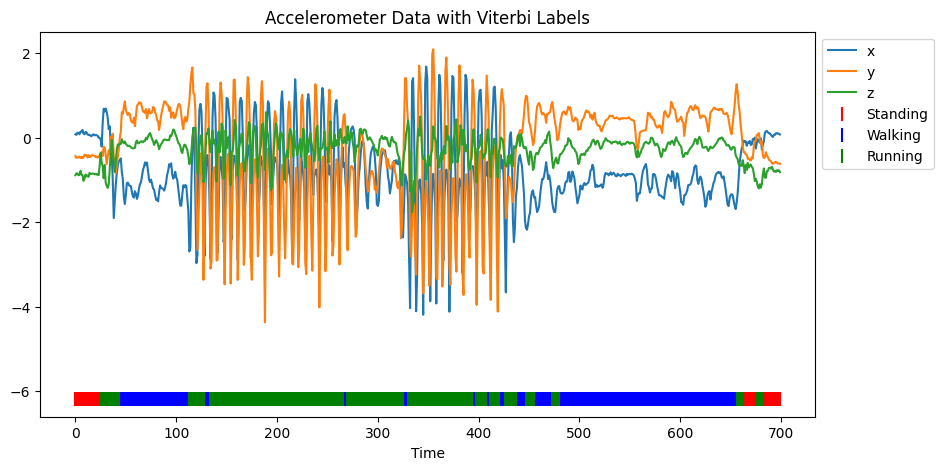

In [60]:
pred_label = viterbi_path
time = np.arange(len(test_data))
x = test_data[:, 0]
y = test_data[:, 1]
z = test_data[:, 2]
# Plot the first 500 data points
plt.figure(figsize=(10, 5))
plt.plot(time, x, label="x")
plt.plot(time, y, label="y")
plt.plot(time, z, label="z")
# pred_labelごとに色分けして描画
colors = {0: 'red', 1: 'blue', 2: 'green'}
labels = {0: "Standing", 1: "Walking", 2: "Running"}
for label, color in colors.items():
    idx = np.where(pred_label == label)[0]
    plt.scatter(time[idx], [min(x)-2]*len(idx), color=color, label=labels[label], marker='|', s=100)
plt.title("Accelerometer Data with Viterbi Labels")
plt.xlabel("Time")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Use random initialization

In [61]:
# Initial state probabilities
initia_state = np.array([1, 0, 0])  
# Transition probabilities
transition_matrix = np.array([[0.8, 0.1, 0.1], 
                              [0.1, 0.8, 0.1], 
                              [0.1, 0.1, 0.8]])
mc = MarkovChain(initia_state, transition_matrix)

# Emission probabilities
mean1 = np.array([0, 0, 0])
cov1 = np.array([[1, 0, 0], 
                  [0, 1, 0], 
                  [0, 0, 1]])
mean2 = np.array([1, 1, 1])
cov2 = np.array([[1, 0, 0], 
                  [0, 1, 0], 
                  [0, 0, 1]])
mean3 = np.array([2, 2, 2])
cov3 = np.array([[1, 0, 0], 
                  [0, 1, 0], 
                  [0, 0, 1]])
# Create Gaussian distributions
g1 = GaussD(means=mean1, cov=cov1)
g2 = GaussD(means=mean2, cov=cov2)
g3 = GaussD(means=mean3, cov=cov3)

h = HMM(mc, [g1, g2, g3])

In [62]:
h.train(train_data,nIter=100,debug=False)

Iter0 : log-likelihood: -35484.42907041129
Iter1 : log-likelihood: -23751.2912685235
Iter2 : log-likelihood: -23386.84743416977
Iter3 : log-likelihood: -21119.176285275396
Iter4 : log-likelihood: -15901.49096079999
Iter5 : log-likelihood: -13737.318996983591
Iter6 : log-likelihood: -13256.298464246496
Iter7 : log-likelihood: -13058.475402466864
Iter8 : log-likelihood: -12887.269848429034
Iter9 : log-likelihood: -12717.875147059172
Iter10 : log-likelihood: -12563.315454957097
Iter11 : log-likelihood: -12444.481769806383
Iter12 : log-likelihood: -12357.08087176044
Iter13 : log-likelihood: -12285.1813491804
Iter14 : log-likelihood: -12229.086353783287
Iter15 : log-likelihood: -12186.830136914134
Iter16 : log-likelihood: -12151.606633654697
Iter17 : log-likelihood: -12127.065418105565
Iter18 : log-likelihood: -12108.792152988743
Iter19 : log-likelihood: -12093.681609819007
Iter20 : log-likelihood: -12080.288587033108
Iter21 : log-likelihood: -12067.57155416867
Iter22 : log-likelihood: -120

In [63]:
viterbi_path = h.viterbi(test_data)
print("Viterbi path: ", viterbi_path)

Viterbi path:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 1 1 1 1 1

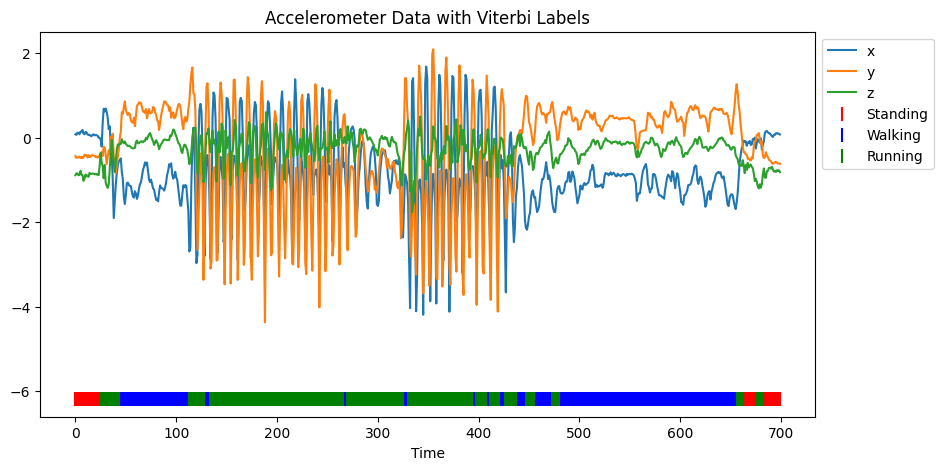

In [64]:
pred_label = viterbi_path
time = np.arange(len(test_data))
x = test_data[:, 0]
y = test_data[:, 1]
z = test_data[:, 2]
# Plot the first 500 data points
plt.figure(figsize=(10, 5))
plt.plot(time, x, label="x")
plt.plot(time, y, label="y")
plt.plot(time, z, label="z")
# pred_labelごとに色分けして描画
colors = {0: 'red', 1: 'blue', 2: 'green'}
labels = {0: "Standing", 1: "Walking", 2: "Running"}
for label, color in colors.items():
    idx = np.where(pred_label == label)[0]
    plt.scatter(time[idx], [min(x)-2]*len(idx), color=color, label=labels[label], marker='|', s=100)
plt.title("Accelerometer Data with Viterbi Labels")
plt.xlabel("Time")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()